In [1]:
!nvidia-smi

Mon Jun  3 07:14:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Download anotated Dataset from Roboflow

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="api-key") #Replace API key
project = rf.workspace("yolow-ewumd").project("emotion-mxrrh")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/emotion-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1717399024.0a28f9795531.3028.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


/content


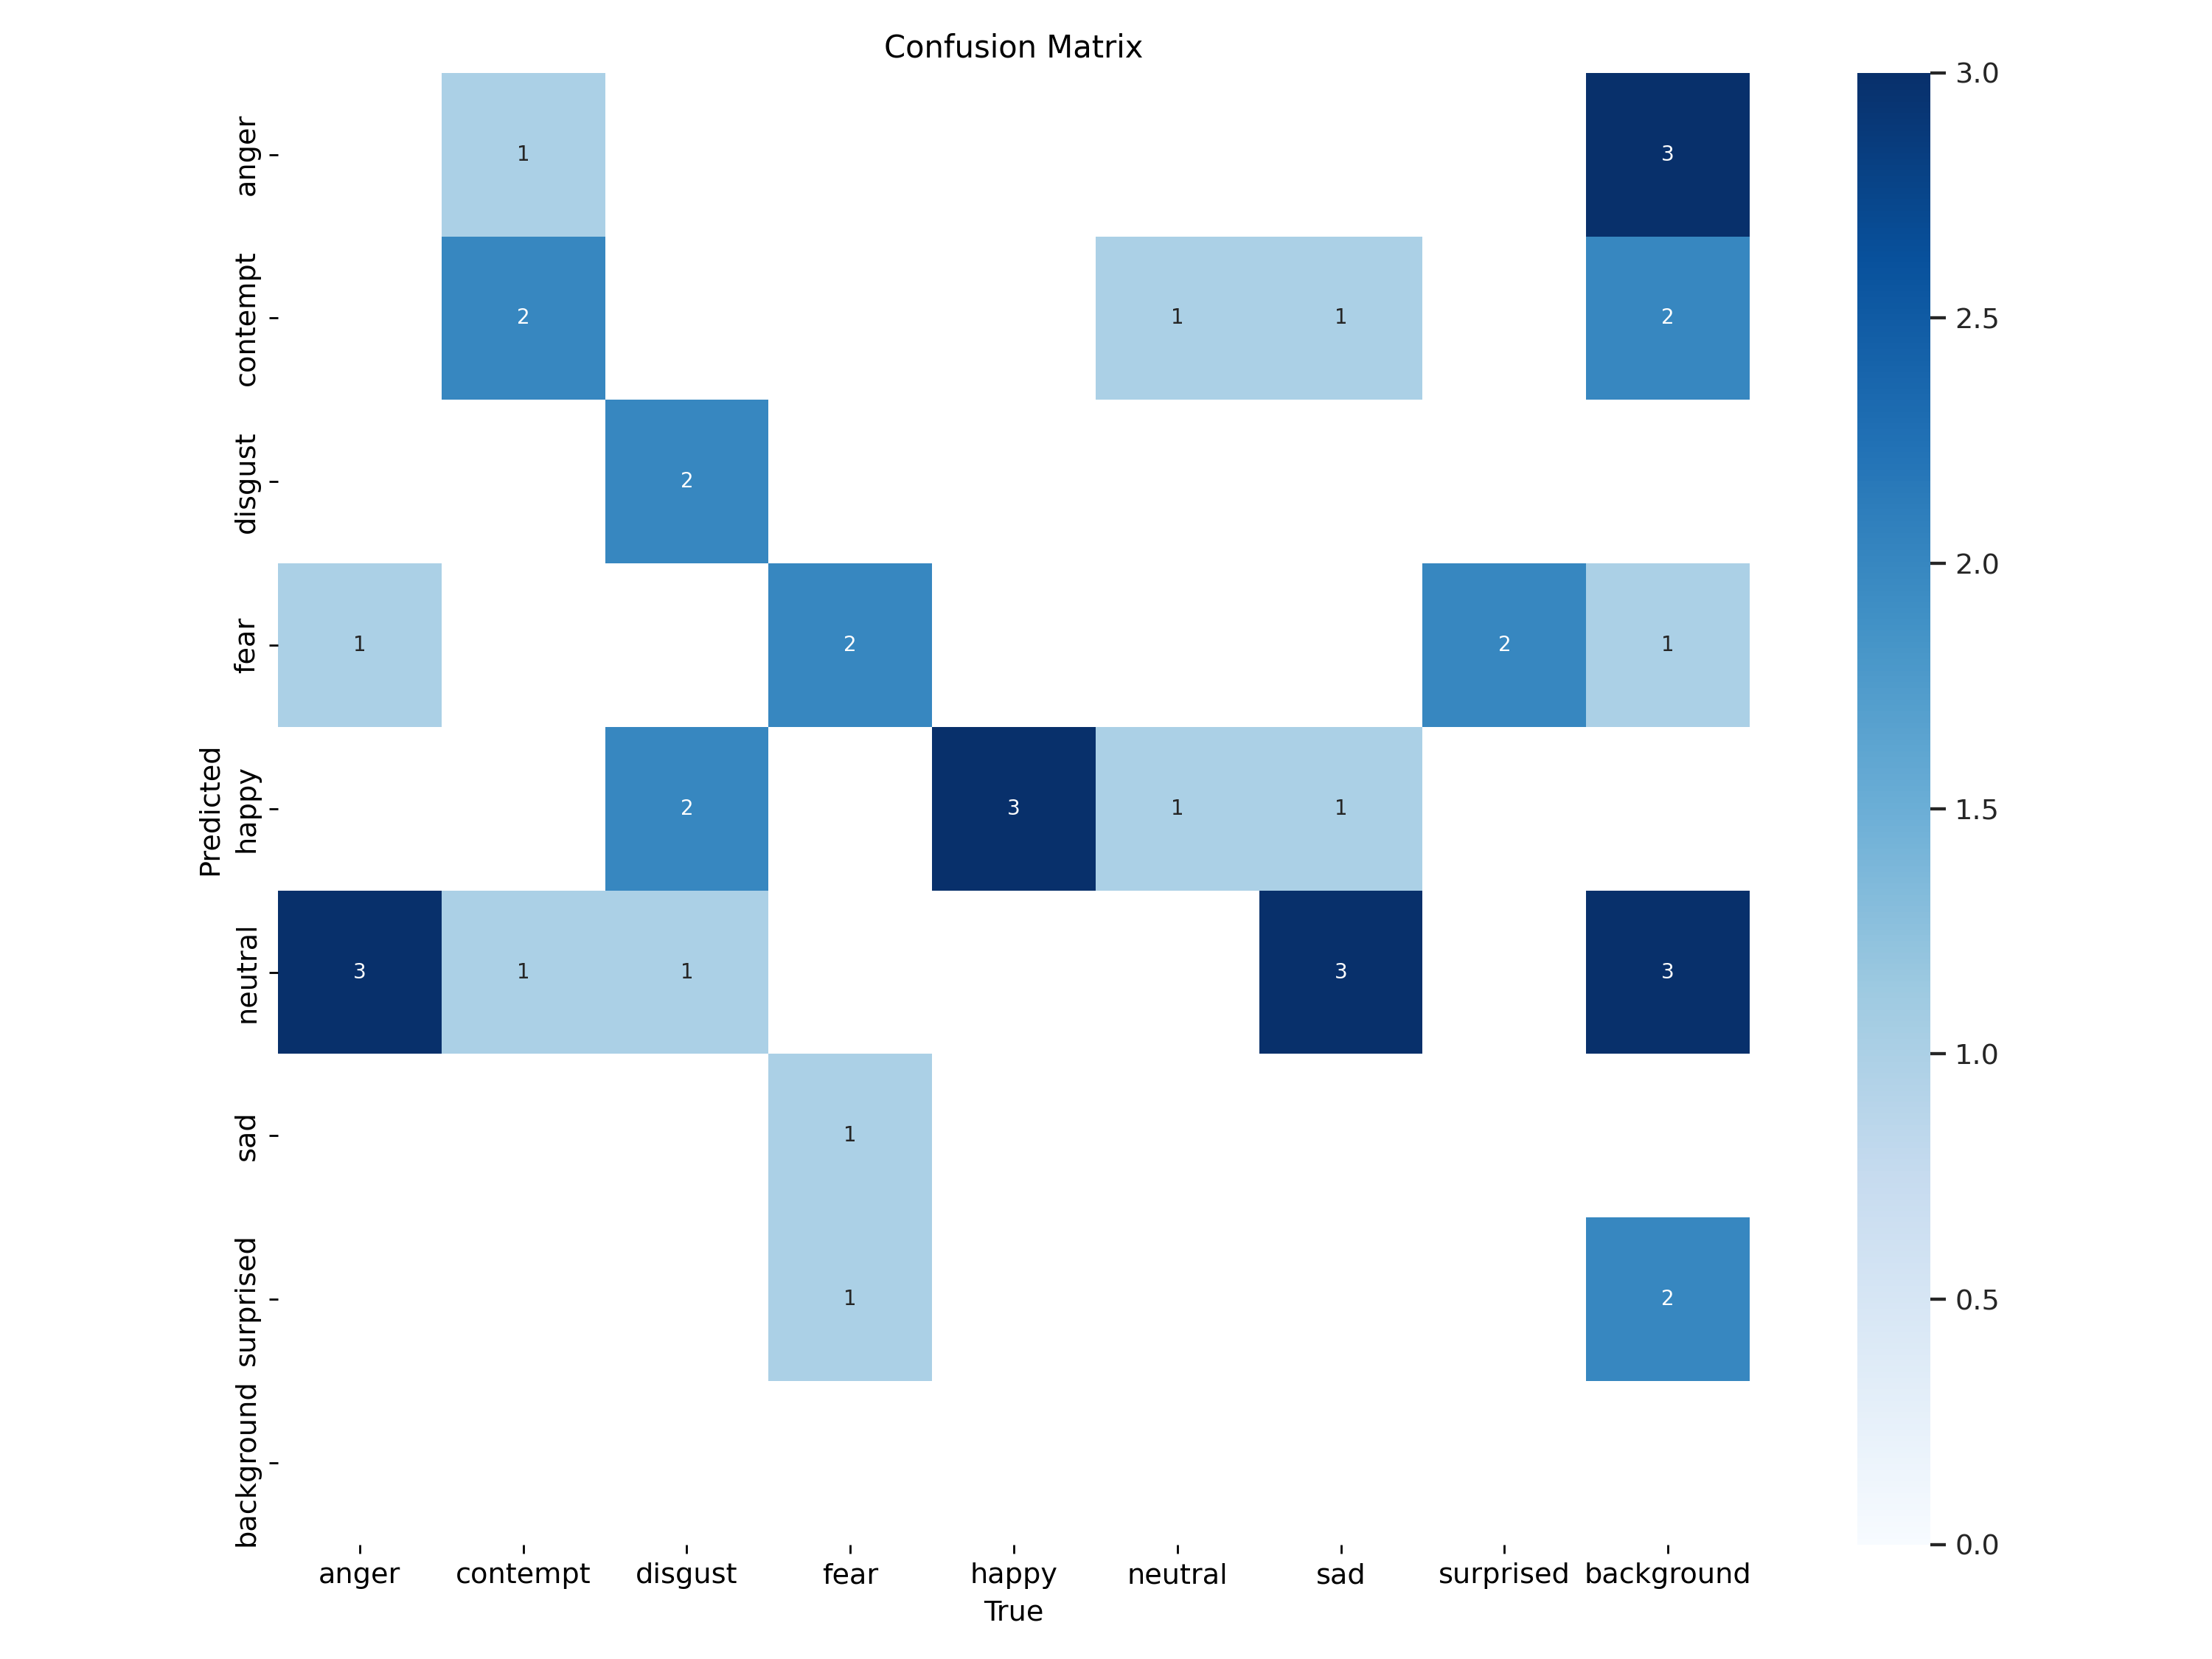

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


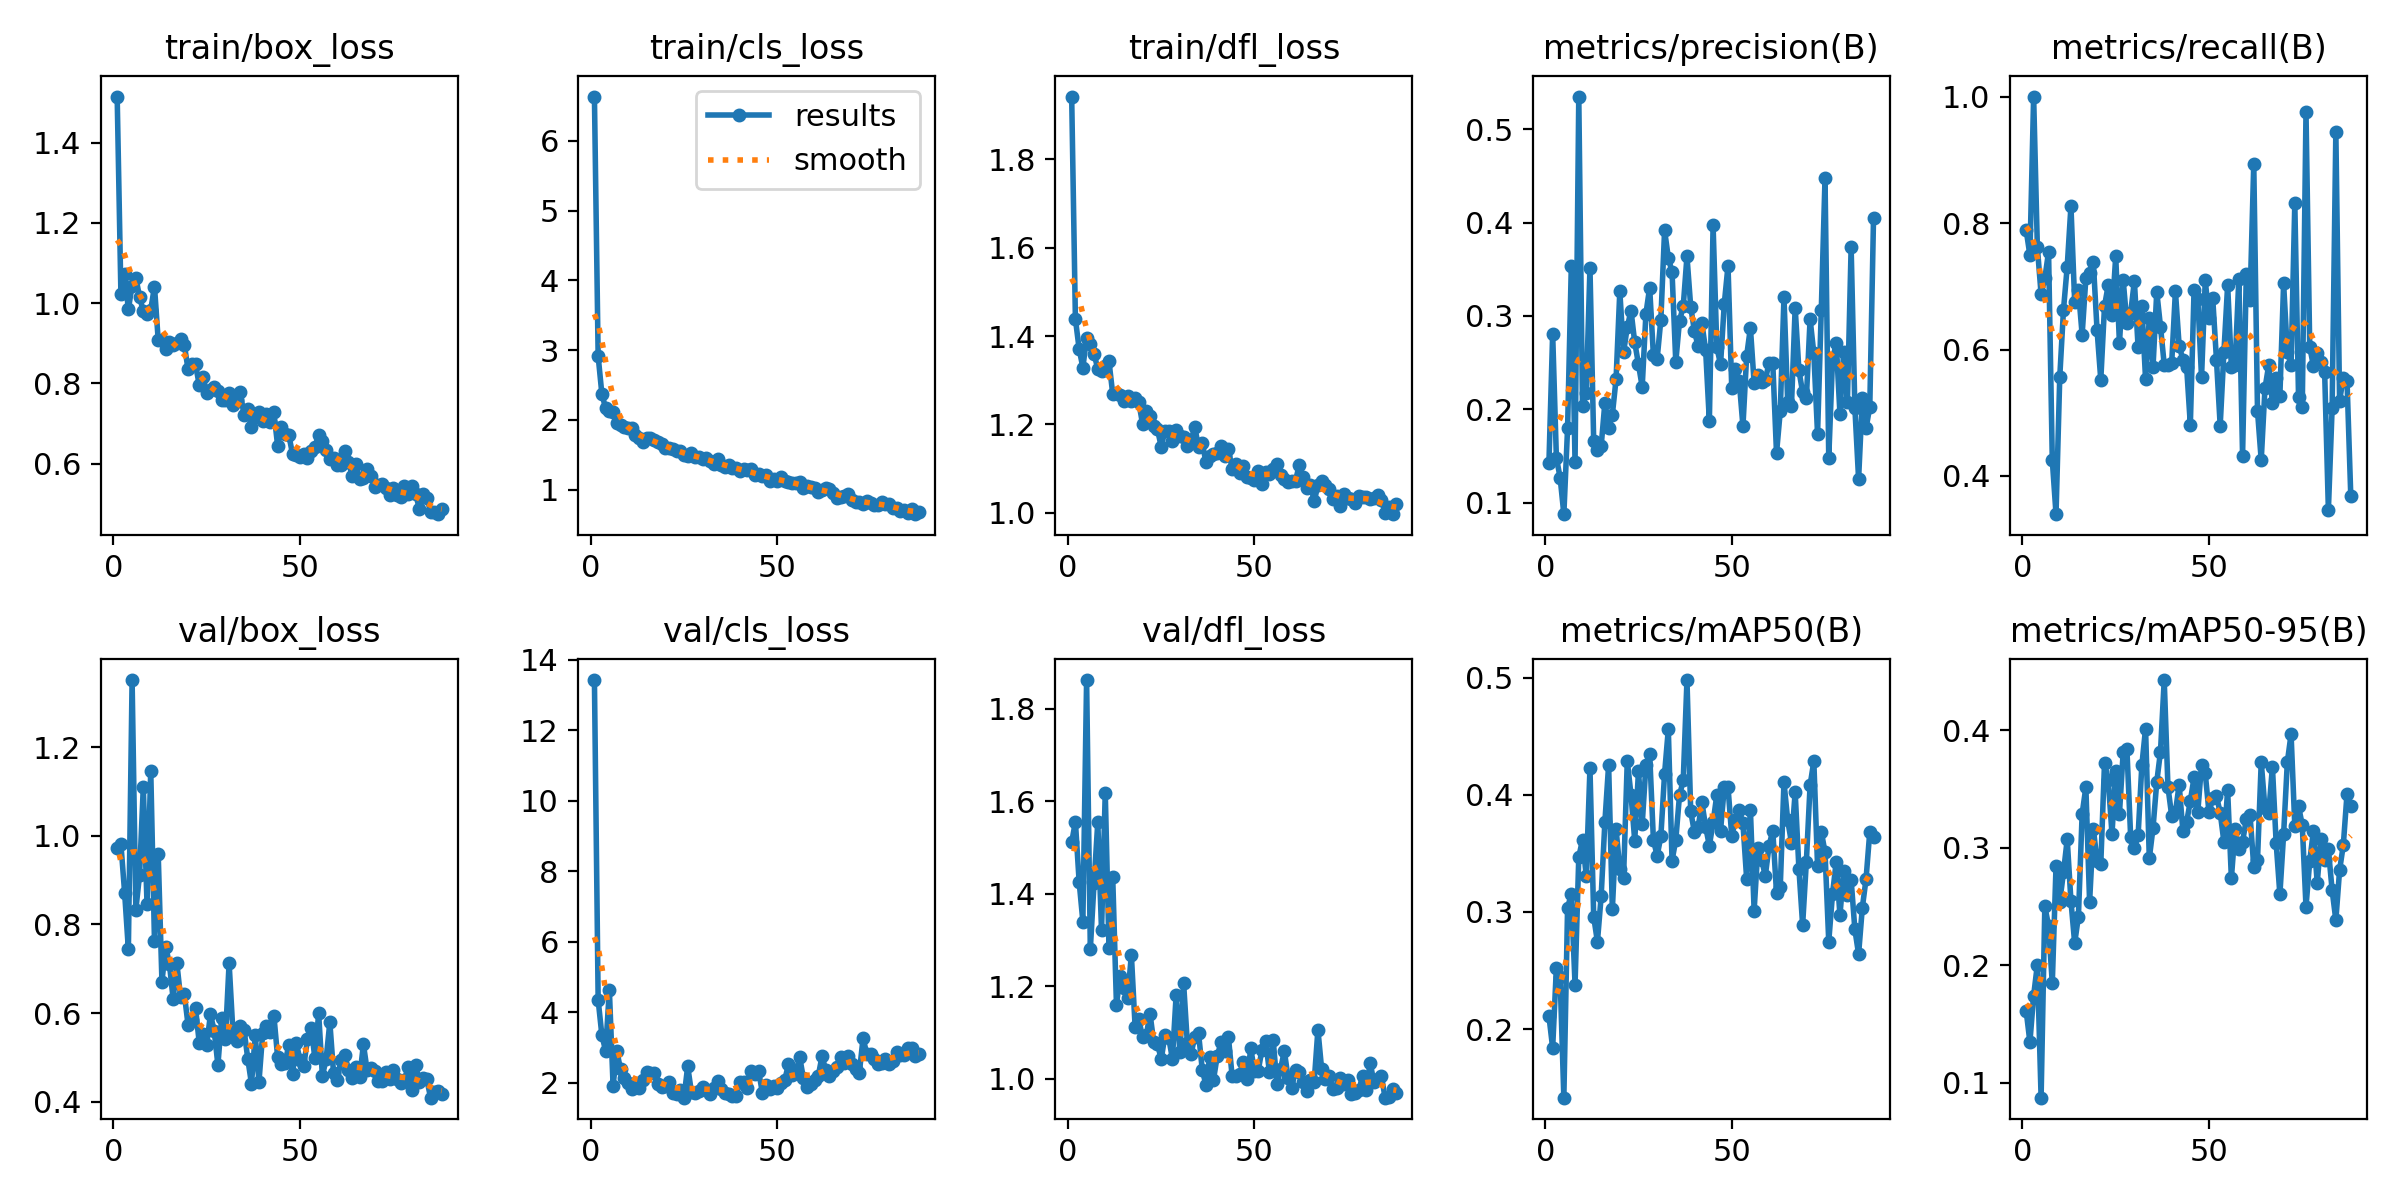

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


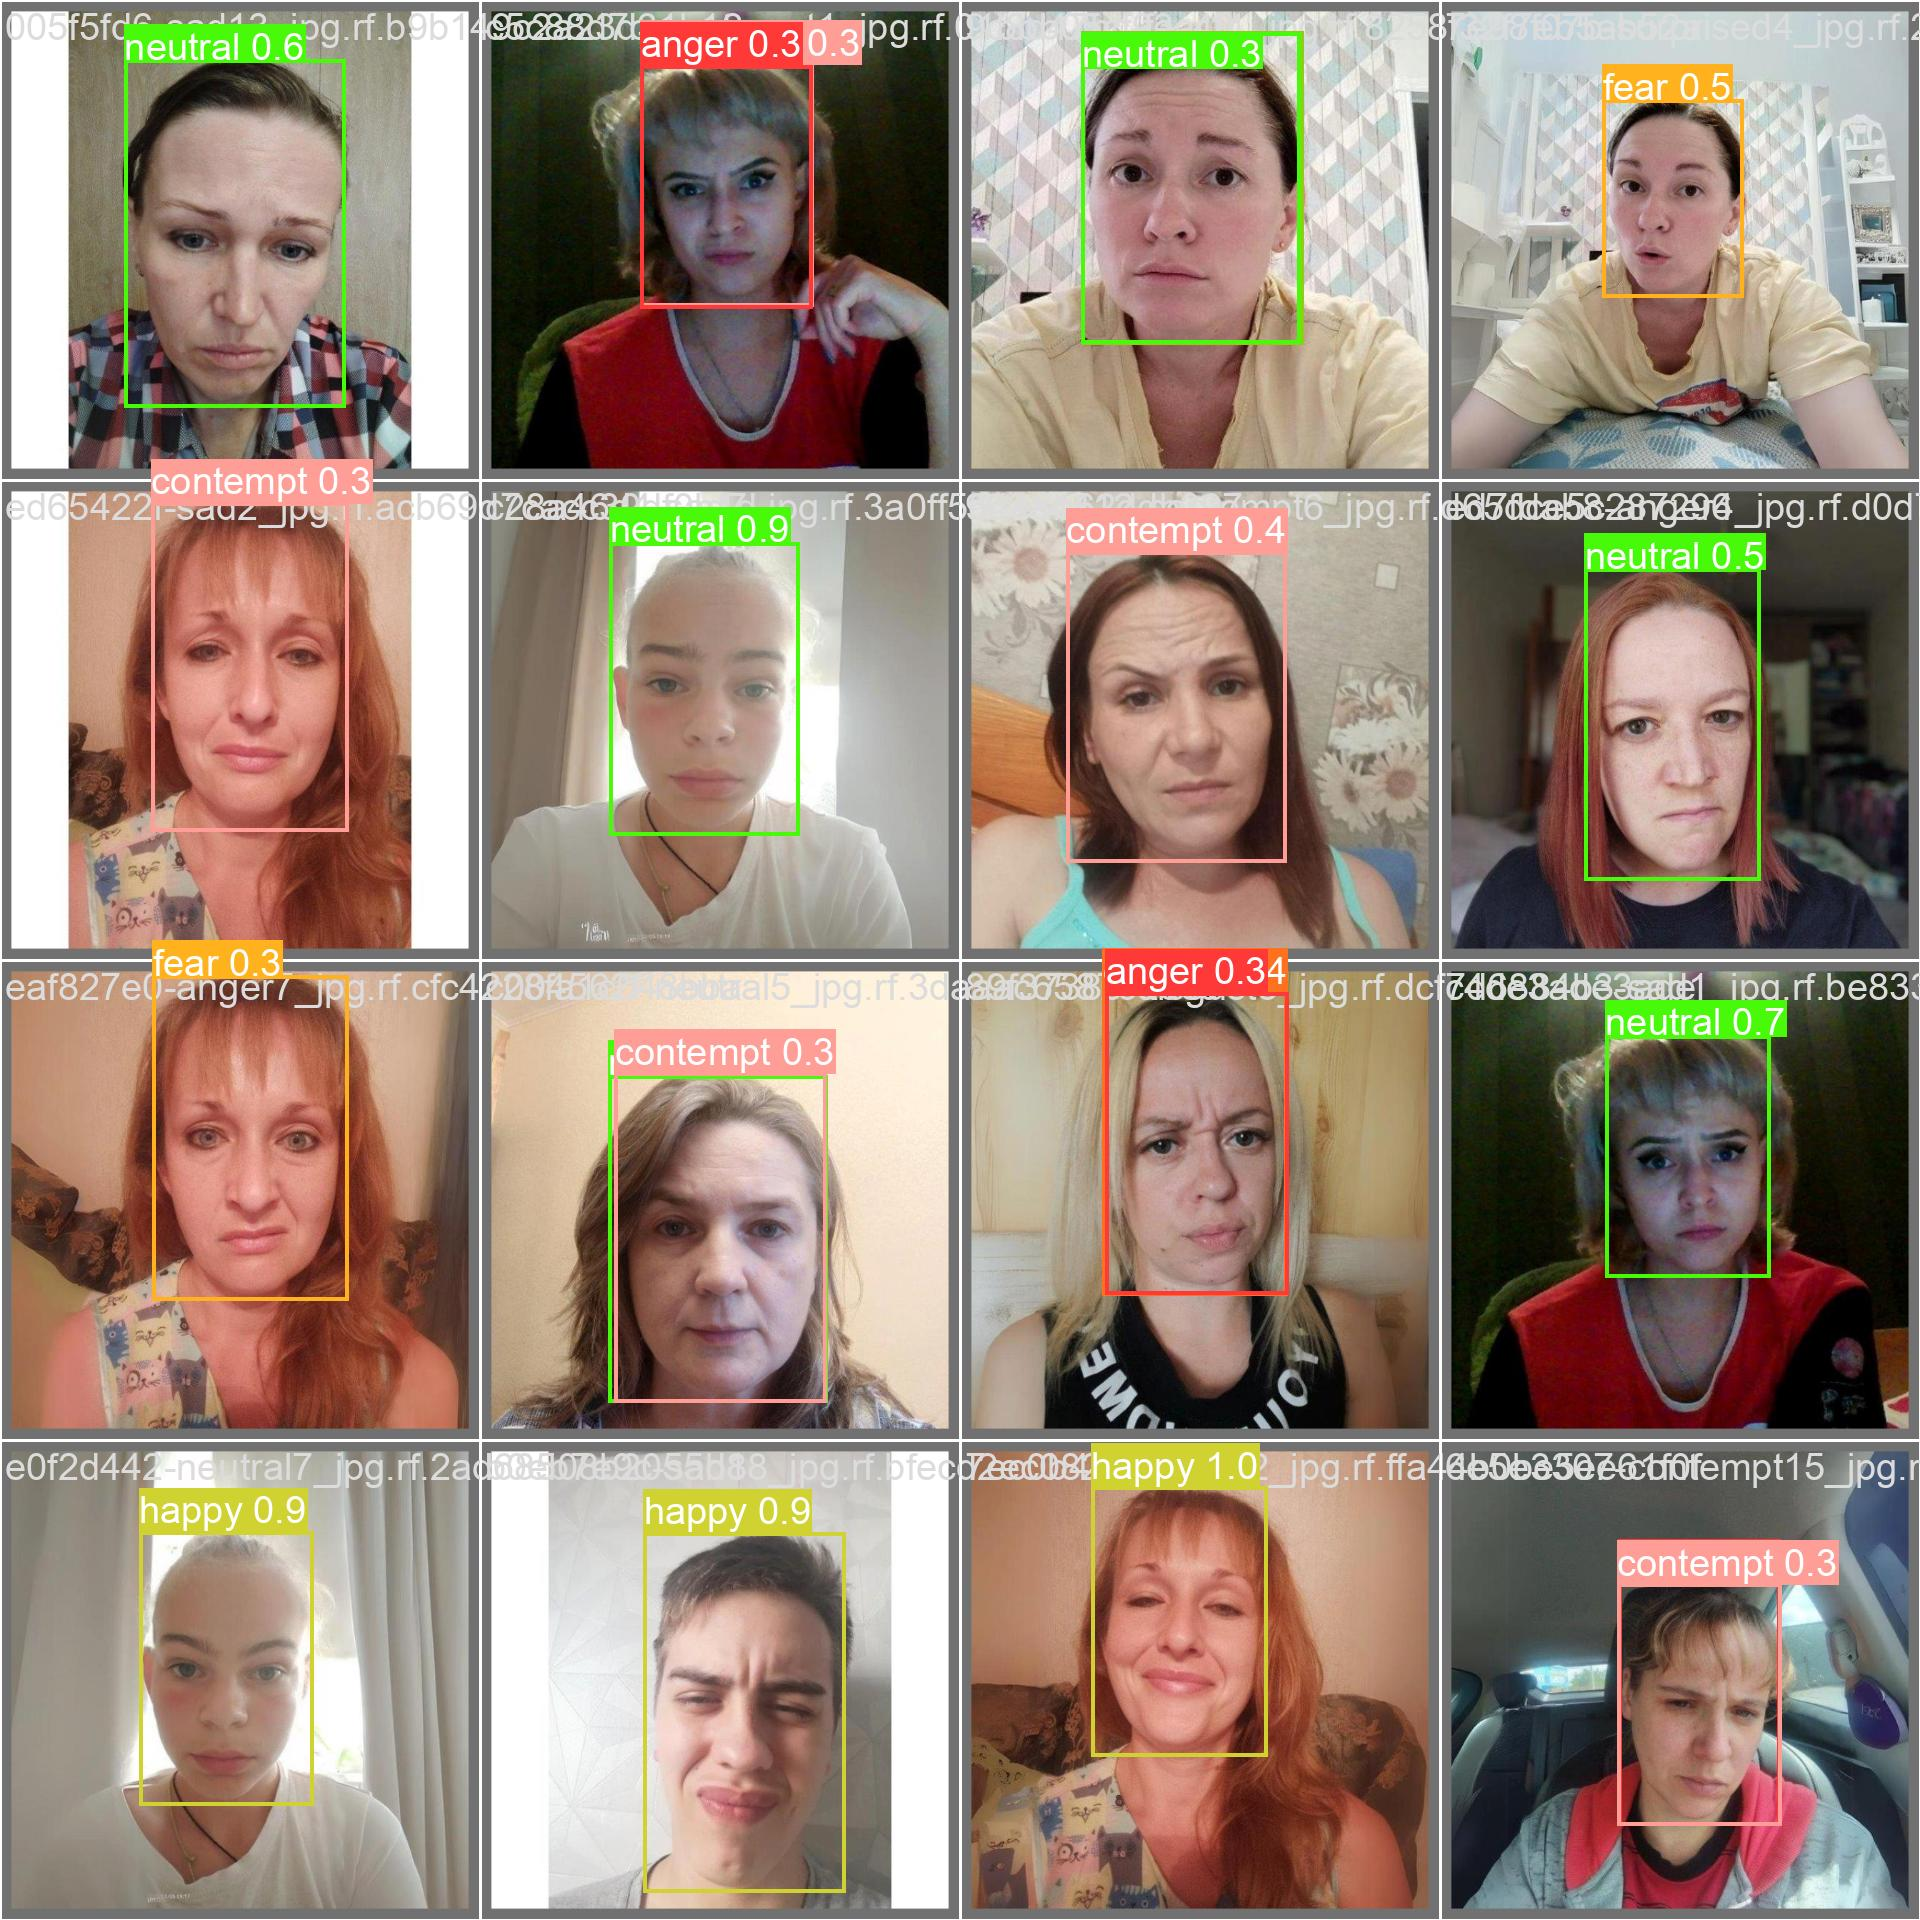

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/emotion-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.41s/it]
                   all         29         29      0.364      0.576      0.498       0.44
                 anger         29          4          0          0       0.22      0.201
              contempt         29          4       0.64          1      0.787      0.668
               disgust         29          5      0.827        0.4      0.568      0.511
                  fear         29          4      0.481       0.75      0.547        0.5
                 happy         29          3       0.39          1      0.995      0.863
               neutral         29  

## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/14 /content/datasets/emotion-1/test/images/156c8e64-neutral12_jpg.rf.966c9462ca8ebbd4cf3aaf07f0816210.jpg: 640x640 1 contempt, 16.3ms
image 2/14 /content/datasets/emotion-1/test/images/28486019-anger3_jpg.rf.5eeeb06da04c68cdaeb18046a21f328e.jpg: 640x640 1 happy, 1 neutral, 16.4ms
image 3/14 /content/datasets/emotion-1/test/images/2a85495b-sad4_jpg.rf.9f61062020cee0afcd00b8f9db91fded.jpg: 640x640 1 neutral, 16.3ms
image 4/14 /content/datasets/emotion-1/test/images/3dc82060-happy11_jpg.rf.f6bac15189601df93c4b1c7ccd0ffbe0.jpg: 640x640 1 happy, 16.3ms
image 5/14 /content/datasets/emotion-1/test/images/6ffa1c7b-surprised18_jpg.rf.e9ccd54c5ffc163de7bf5625229d02f1.jpg: 640x640 1 neutral, 16.3ms
image 6/14 /content/datasets/emotion-1/test/images/7c8b722c-disgust18_jpg.rf.347302402e8cd09e18b96c650f9a2538.jpg: 6

**NOTE:** Let's take a look at few results.

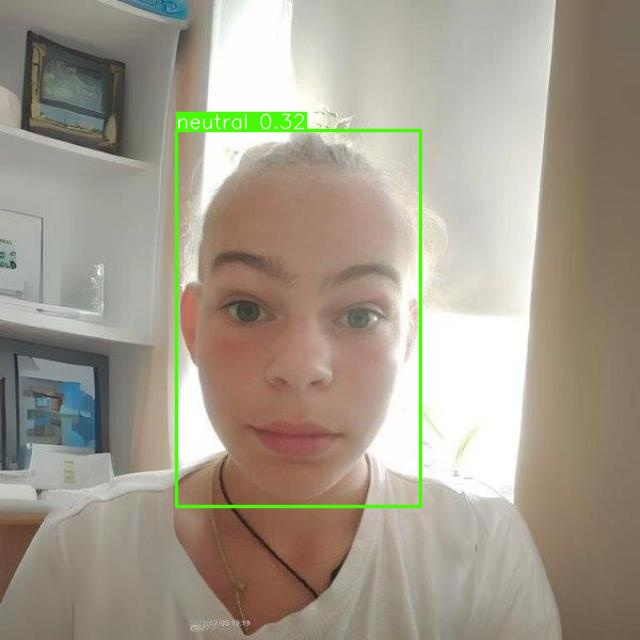

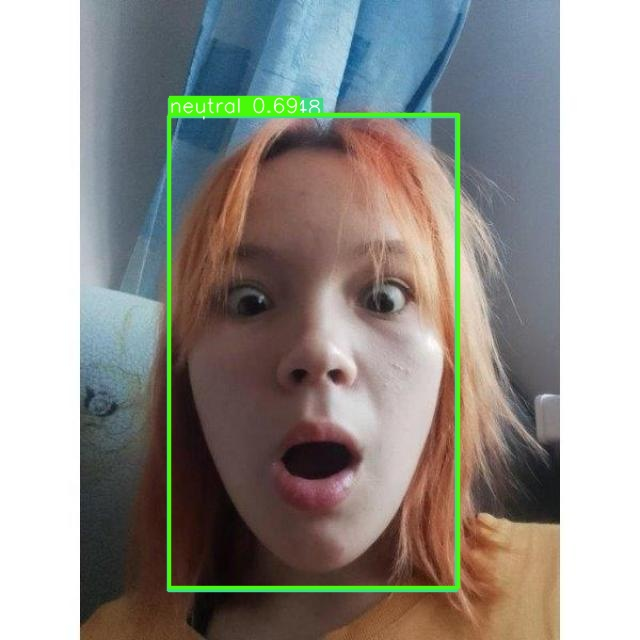

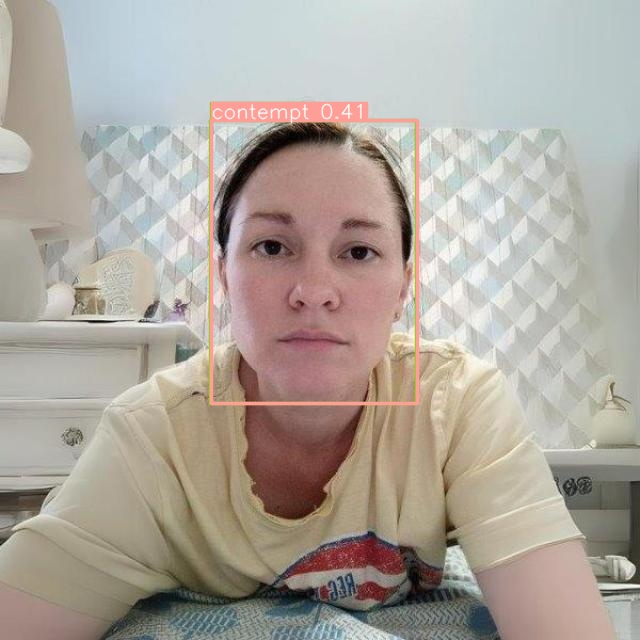

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [26]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/I used to be insecure and envy others Heres my advice.mp4' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 102.0ms
video 1/1 (2/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.7ms
video 1/1 (3/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (4/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (5/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.7ms
video 1/1 (6/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (7/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detection

In [24]:
# Install the required library
!pip install pytube

In [25]:

# Import the necessary module
from pytube import YouTube

# Function to download a YouTube video
def download_youtube_video(url, path):
    yt = YouTube(url)
    stream = yt.streams.get_highest_resolution()
    stream.download(output_path=path)
    print(f'Downloaded: {yt.title}')

# Example usage
video_url = 'https://www.youtube.com/watch?v=jvDK5nzERsA'
download_path = '/content'
download_youtube_video(video_url, download_path)


Downloaded: I used to be insecure and envy others. Here's my advice.
